# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

Machine Learning (ML) is an appropriate solution to deploy for predicting flight delays in this assignment due to several reasons such as the complexity and size of the data.

The dataset consists of multiple dependant features, such as scheduled and actual departure or arrival times, causes of delay, airport traffic, and other delay reasons, across millions of records collected over several years. These factors create non-linear relationships that traditional systems would struggle to capture, making ML a far more effective approach.

Specifically, ML excels in identifying patterns and correlations within large, high-dimensional datasets, such as this one, which includes both temporal (flight dates, time of day) and categorical (airline, origin/destination airports) variables. Given the huge size of the dataset and the complexity of flight delay reasons, ML can process and analyze this data efficiently to generate accurate, real-time predictions.

Moreover, ML’s ability to generalize from historical data to unseen future data is crucial for providing predictive insights, which are much needed for a system aimed at informing customers about potential delays before booking. The use of ML can significantly enhance customer experience by offering data-driven, timely predictions, making it a scalable and practical solution for this business problem.

### 2. Formulate the business problem, success metrics, and desired ML output.

1. Business Problem

    The travel booking platform aims to improve customer experience by predicting flight delays before customers book. The goal is to use historical flight and weather data to determine the likelihood of a flight being delayed by 15 minutes or more, allowing passengers to make informed decisions and avoid disruptions.


2. Success Metrics

    Accuracy: Percentage of correct delay predictions.

    Precision: Proportion of predicted delays that were correct.

    Recall: Proportion of actual delays correctly predicted.

    F1 Score: Balance between precision and recall.

    Customer Satisfaction: Measured through feedback after the booking process.
    

3. Desired ML Output

    The ML model will provide a binary output-

    "Delayed"- Predicts if a flight will be delayed by 15 minutes or more.

    "On-time"- Predicts if the flight will depart within the expected time.

    The model should analyze weather conditions, flight schedules, and airport data in real time to offer accurate, data-driven predictions, improving customer satisfaction and decision-making.

### 3. Identify the type of ML problem you’re dealing with.

The type of machine learning (ML) problem we're dealing with in predicting flight delays is a binary classification problem. The task is to classify whether a flight will be "Delayed" (by 15 minutes or more) or "On-time" based on historical flight data and weather conditions. 

Input Features- Variables such as weather data (e.g., temperature, wind speed, precipitation), scheduled flight times, airline information, and airport traffic data.

Output- A binary label indicating either "Delayed" or "On-time."

Since the goal is to categorize flights into one of two classes, this falls under the category of supervised learning with a binary classification task.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [9]:
import os
from pathlib2 import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>


# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

In [11]:
# download the files

# <note: make them all relative, absolute path is not accepted>

# Defining relative paths
zip_path = 'data_compressed.zip'  
base_path = '.'  # current working directory
csv_base_path = 'extracted_csvs'  # folder to extract the zip files

# Creating the directory to extract the zip files if it doesn't exist
if not os.path.exists(csv_base_path):
    os.makedirs(csv_base_path)

In [12]:
# How many zip files do we have? write a code to answer it.

# Iterating through the main zipped file to count the number of zip files it has
with ZipFile(zip_path, 'r') as zip_ref:
    zip_files = [f for f in zip_ref.namelist() if f.endswith('.zip')]
    num_zip_files = len(zip_files)
    print(f"Number of zip files = {num_zip_files}")

Number of zip files = 60


In [13]:
# Folder name where main zip file will be extracted to
zip_files_path = 'data_compressed'  

# Extracting the main data_compressed.zip file
with ZipFile(zip_path, 'r') as main_zip:
    main_zip.extractall(path=base_path)

print(f"The contents of {zip_path} were extracted to: {zip_files_path}")

The contents of data_compressed.zip were extracted to: data_compressed


#### Extract CSV files from ZIP files

In [15]:
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')

# All zip files in the zip_files_path need to be extracted
zip_files = [os.path.join(zip_files_path, f) for f in os.listdir(zip_files_path)]

for file in zip_files:
    zip2csv(file, csv_base_path)

print("Files Extracted")

Extracting data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_3.zip 
Extracting data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_2.zip 
Extracting data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_1.zip 
Extracting data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip 
Extracting data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip 
Extracting data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_5.zip 
Extracting data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2016_4.zip 
Extracting data_compressed/On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_6.zip 
Extracting data_comp

In [16]:
# How many csv files have we extracted? write a code to answer it.

csv_files = [f for f in os.listdir(csv_base_path) if f.endswith('.csv')]
csv_file_count = len(csv_files)

print(f"Number of CSV files extracted = {csv_file_count}")

Number of CSV files extracted = 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [18]:
from IPython.display import IFrame

html_path = os.path.relpath(f"{csv_base_path}/readme.html")
IFrame(src=html_path, width=1000, height=600)

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [20]:
csv_file_path = 'extracted_csvs/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv'

# Reading the CSV file using Pandas
df_temp = pd.read_csv(csv_file_path)

df_temp.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,3,9,3,1,2018-09-03,9E,20363,9E,N908XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,3,9,9,7,2018-09-09,9E,20363,9E,N315PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,3,9,10,1,2018-09-10,9E,20363,9E,N582CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,3,9,13,4,2018-09-13,9E,20363,9E,N292PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,3,9,14,5,2018-09-14,9E,20363,9E,N600LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print the row and column length in the dataset, and print the column names.

In [22]:
df_shape = df_temp.shape
rows, columns = df_shape
print(f'Rows and columns in one csv file is {rows} rows and {columns} columns')

Rows and columns in one csv file is 585749 rows and 110 columns


**Question**: Print the first 10 rows of the dataset.  

In [24]:
df_temp.head(10)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2018,3,9,3,1,2018-09-03,9E,20363,9E,N908XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,3,9,9,7,2018-09-09,9E,20363,9E,N315PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,3,9,10,1,2018-09-10,9E,20363,9E,N582CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,3,9,13,4,2018-09-13,9E,20363,9E,N292PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,3,9,14,5,2018-09-14,9E,20363,9E,N600LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2018,3,9,16,7,2018-09-16,9E,20363,9E,N316PQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018,3,9,17,1,2018-09-17,9E,20363,9E,N916XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2018,3,9,20,4,2018-09-20,9E,20363,9E,N371CA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2018,3,9,21,5,2018-09-21,9E,20363,9E,N601LR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,3,9,23,7,2018-09-23,9E,20363,9E,N906XJ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [26]:
print('The column names are-')
print('#########')
for col in df_temp.columns: 
    print(col)
print('\nThe number of columns = ', len(df_temp.columns))

The column names are-
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1T

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [28]:
# Printing all the columns that contain the word 'Del'
columns_with_del = [col for col in df_temp.columns if 'Del' in col]

print(f'Columns containing the word "Del"-')
print('#########')
for col in columns_with_del:
    print(col)

print(f'\nNumber of columns containing the word "Del" = {len(columns_with_del)}')

Columns containing the word "Del"-
#########
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DivArrDelay

Number of columns containing the word "Del" = 14


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [30]:
# 1. How many rows and columns does the dataset have?
print("\n 1. The number of rows are ", df_temp.shape[0], " and the number of columns are ", df_temp.shape[1])

# 2. How many years are included in the dataset?
print("\n 2. The years in this dataset are- ", df_temp['Year'].unique())
print("    The number of years in this dataset = ", len(df_temp['Year'].unique()))
# How many months are included in the dataset?
print("\n    The months covered in this dataset are- ", df_temp['Month'].unique())
print("    The number of months in this dataset = ", len(df_temp['Month'].unique()))

# 3. What is the date range for the dataset?
print("\n 3. The date range for data is ", min(df_temp['FlightDate']), " to ", max(df_temp['FlightDate']))

# 4. Which airlines are included in the dataset?
print("\n 4. The airlines covered in this dataset are- ", list(df_temp['Reporting_Airline'].unique()))

# 5. Which origin and destination airports are covered?
print("\n 5. The Origin airports covered are\n", list(df_temp['Origin'].unique()))
print("\n  The Destination airports covered are\n ", list(df_temp['Dest'].unique()))



 1. The number of rows are  585749  and the number of columns are  110

 2. The years in this dataset are-  [2018]
    The number of years in this dataset =  1

    The months covered in this dataset are-  [9]
    The number of months in this dataset =  1

 3. The date range for data is  2018-09-01  to  2018-09-30

 4. The airlines covered in this dataset are-  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']

 5. The Origin airports covered are
 ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MK

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [32]:
# Combining the counts into a single DataFrame
counts = pd.DataFrame({'Origin': df_temp['Origin'].value_counts(), 'Destination': df_temp['Dest'].value_counts()})
print(counts)

     Origin  Destination
ABE     303          303
ABI     169          169
ABQ    2077         2076
ABR      60           60
ABY      79           79
..      ...          ...
WRG      60           60
WYS      52           52
XNA    1004         1004
YAK      60           60
YUM      96           96

[346 rows x 2 columns]


**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [34]:
# Sorting by the number of flights for Origin airports and display the top 15
print("Top 15 Origin and Destination airports based on number of flights:")
print(counts.sort_values(by='Origin', ascending=False).head(15))

Top 15 Origin and Destination airports based on number of flights:
     Origin  Destination
ATL   31525        31521
ORD   28257        28250
DFW   22802        22795
DEN   19807        19807
CLT   19655        19654
LAX   17875        17873
SFO   14332        14348
IAH   14210        14203
LGA   13850        13850
MSP   13349        13347
LAS   13318        13322
PHX   13126        13128
DTW   12725        12724
BOS   12223        12227
SEA   11872        11877


**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

#### Yes, flight delays can be predicted using machine learning. This is a binary classification problem where the goal is to classify if a flight will be delayed based on features like flight time, origin, destination, and airline information.

##### This can be done using the below steps-

##### 1. Defining Target Variable- We can DepDel15 as the target, indicating if a flight is delayed by 15 minutes or more.
##### 2. Selecting Features- Features like Year, Month, DayOfWeek, Origin, Dest, CRSDepTime, Distance, and Airline can be useful for prediction.
##### 3. Data Preprocessing- We need to handle the multiple missing values, encode categorical variables (e.g., Origin, Dest), and scale the numerical features to ensure accurate predictions.
##### 4. Model Selection- Models like Logistic Regression, Random Forest and XGBoost can be used for the predictions.
##### 5. Model Evaluation- Evaluating the model using metrics like accuracy, precision, recall is necessary to check the performance of the models on the data.

##### By using relevant flight information and machine learning models, flight delay prediction can be done and customer experience will be enhanced by providing early delay warnings.

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [39]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name=None):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    file_name: output file name to save the combined dataframe (optional)
    """
    # Creating an empty dataframe
    combined_df = pd.DataFrame()

    # Iterating through each CSV file
    for file in csv_files:
        print(f"Processing file: {file}")
        df = pd.read_csv(file)
        
        # Filtering columns based on filter_cols
        df_filtered = df[filter_cols]
        
        # Filtering rows based on subset_cols and subset_vals using .isin() method
        for col, vals in zip(subset_cols, subset_vals):
            df_filtered = df_filtered[df_filtered[col].isin(vals)]
        
        # Concatenating the filtered dataframe with the combined dataframe
        combined_df = pd.concat([combined_df, df_filtered], ignore_index=True)

    # Saving the combined dataframe to a file
    if file_name:
        combined_df.to_csv(file_name, index=False)
    
    return combined_df


In [40]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [42]:
start = time.time()

# Automatically getting all CSV files in the folder
csv_file_names = [file for file in os.listdir(csv_base_path) if file.endswith('.csv')]

# Generating full paths to each file by combining the folder path and the file name
csv_files = [os.path.join(csv_base_path, file_name) for file_name in csv_file_names]

combined_csv_filename = os.path.join(base_path, 'combined_files.csv')

combined_df = combine_csv(csv_files, cols, subset_cols, subset_vals, file_name=combined_csv_filename)

print(f'\ncsv\'s merged in {round((time.time() - start)/60,2)} minutes')

Processing file: extracted_csvs/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_10.csv
Processing file: extracted_csvs/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2017_2.csv
Processing file: extracted_csvs/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_10.csv
Processing file: extracted_csvs/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2015_1.csv
Processing file: extracted_csvs/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_11.csv
Processing file: extracted_csvs/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2017_3.csv
Processing file: extracted_csvs/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2014_11.csv
Processing file: extracted_csvs/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2017_1.csv
Processing file: extracted_csvs/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2015_3.csv
Processing file: extracted_csvs/On_Time_Reporting_Carrier_On

#### Load dataset

Load the combined dataset.

In [44]:
data = pd.read_csv(combined_csv_filename)

Print the first 5 records.

In [46]:
data.head(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,ArrDel15,AirTime
0,2014,4,10,1,3,2014-10-01,AA,DFW,TX,SFO,CA,755,0.0,0.0,1464.0,6,-9.0,0.0,0.0,195.0
1,2014,4,10,2,4,2014-10-02,AA,DFW,TX,SFO,CA,755,0.0,0.0,1464.0,6,40.0,40.0,1.0,199.0
2,2014,4,10,3,5,2014-10-03,AA,DFW,TX,SFO,CA,755,0.0,0.0,1464.0,6,9.0,9.0,0.0,196.0
3,2014,4,10,4,6,2014-10-04,AA,DFW,TX,SFO,CA,755,0.0,0.0,1464.0,6,-16.0,0.0,0.0,195.0
4,2014,4,10,5,7,2014-10-05,AA,DFW,TX,SFO,CA,755,0.0,0.0,1464.0,6,-8.0,0.0,0.0,192.0


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [48]:
# 1. How many rows and columns does the dataset have?
print("1. The number of rows = ", data.shape[0], "and the number of columns = ", data.shape[1])

# 2. How many years are included in the dataset?
print("\n2. The years in this dataset are- ", sorted(list(data['Year'].unique())))
print("   The number of years in this dataset = ", len(list(data['Year'].unique())))

# Extracting the unique months
print("\n   The months covered in this dataset are- ", sorted(list(data['Month'].unique())))
print("   The number of months covered in this dataset = ", len(list(data['Month'].unique())))

# 3. What is the date range for the dataset?
print("\n3. The date range for data is ", min(data['FlightDate']), " to ", max(data['FlightDate']))

# 4. Which airlines are included in the dataset?
print("\n4. The airlines covered in this dataset are- ", list(data['Reporting_Airline'].unique()))

# 5. Which origin and destination airports are covered?
print("\n5. The Origin airports covered are- ", list(data['Origin'].unique()))
print("   The Destination airports covered are- ", list(data['Dest'].unique()))


1. The number of rows =  1658130 and the number of columns =  20

2. The years in this dataset are-  [2014, 2015, 2016, 2017, 2018]
   The number of years in this dataset =  5

   The months covered in this dataset are-  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
   The number of months covered in this dataset =  12

3. The date range for data is  2014-01-01  to  2018-12-31

4. The airlines covered in this dataset are-  ['AA', 'DL', 'WN', 'UA', 'OO']

5. The Origin airports covered are-  ['DFW', 'SFO', 'DEN', 'PHX', 'IAH', 'ATL', 'ORD', 'LAX', 'CLT']
   The Destination airports covered are-  ['SFO', 'DFW', 'DEN', 'PHX', 'ORD', 'IAH', 'ATL', 'LAX', 'CLT']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [50]:
# Renaming the column 'ArrDel15' to 'is_delay'
data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True)

# Verifying the column name change 
data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Origin,OriginState,Dest,DestState,CRSDepTime,Cancelled,Diverted,Distance,DistanceGroup,ArrDelay,ArrDelayMinutes,is_delay,AirTime
0,2014,4,10,1,3,2014-10-01,AA,DFW,TX,SFO,CA,755,0.0,0.0,1464.0,6,-9.0,0.0,0.0,195.0
1,2014,4,10,2,4,2014-10-02,AA,DFW,TX,SFO,CA,755,0.0,0.0,1464.0,6,40.0,40.0,1.0,199.0
2,2014,4,10,3,5,2014-10-03,AA,DFW,TX,SFO,CA,755,0.0,0.0,1464.0,6,9.0,9.0,0.0,196.0
3,2014,4,10,4,6,2014-10-04,AA,DFW,TX,SFO,CA,755,0.0,0.0,1464.0,6,-16.0,0.0,0.0,195.0
4,2014,4,10,5,7,2014-10-05,AA,DFW,TX,SFO,CA,755,0.0,0.0,1464.0,6,-8.0,0.0,0.0,192.0


Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [52]:
# Checking for null values in all columns
null_counts = data.isnull().sum(axis=0)
print(null_counts)

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
Cancelled                0
Diverted                 0
Distance                 0
DistanceGroup            0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
AirTime              22540
dtype: int64


The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [54]:
print(f"Number of rows before cleaning = {len(data)}")

# Removing rows where ArrDelay, ArrDelayMinutes, or AirTime are missing
data = data[~data['ArrDelay'].isnull() & ~data['ArrDelayMinutes'].isnull() & ~data['AirTime'].isnull()]

# Verifying the number of rows after removing missing values
print(f"Number of rows after cleaning  = {len(data)}")

Number of rows before cleaning = 1658130
Number of rows after cleaning  = 1635590


In [55]:
# Checking if any null values are left out
null_counts = data.isnull().sum(axis=0)
print(null_counts)

Year                 0
Quarter              0
Month                0
DayofMonth           0
DayOfWeek            0
FlightDate           0
Reporting_Airline    0
Origin               0
OriginState          0
Dest                 0
DestState            0
CRSDepTime           0
Cancelled            0
Diverted             0
Distance             0
DistanceGroup        0
ArrDelay             0
ArrDelayMinutes      0
is_delay             0
AirTime              0
dtype: int64


Get the hour of the day in 24-hour time format from CRSDepTime.

In [57]:
# Extract the hour of the day from CRSDepTime
data['DepHourofDay'] = data['CRSDepTime'] // 100

# Verifying if new column is added
print(data[['CRSDepTime', 'DepHourofDay']].head())

   CRSDepTime  DepHourofDay
0         755             7
1         755             7
2         755             7
3         755             7
4         755             7


## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

Yes we can predict whether a flight will be delayed by more than 15 minutes, using the set of features that describe the flight and its associated details. The target variable is **`is_delay`**, which takes a binary value, making this a classification problem-
- **1**: Flight delayed by more than 15 minutes.
- **0**: Flight on-time or delayed by less than 15 minutes.

#### Key Features
- **Date and Time Information**:
  - `Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `DepHourofDay`
  - `CRSDepTime` (Scheduled Departure Time)
- **Flight Details**:
  - `Reporting_Airline` (Airline operating the flight)
  - `Origin`, `OriginState` (Departure airport and state)
  - `Dest`, `DestState` (Destination airport and state)
  - `Distance`, `DistanceGroup` (Flight distance and categorized distance group)
- **Flight Status**:
  - `Cancelled` (If the flight was cancelled)
  - `Diverted` (If the flight was diverted)
  - `AirTime` (Actual flight time)
- **Delay Information**:
  - `ArrDelay`, `ArrDelayMinutes` (Arrival delay in minutes)
  
#### Problem Type
- **Binary Classification**: Since the target variable `is_delay` is binary (0 or 1), this is a binary classification problem, thus we can use classification algorithms like Logistic Regression, Random Forest Classifier, or Gradient Boosting for this task.

#### Goal
- Train a machine learning model to predict flight delays using the above features. The model can help airlines and passengers make informed decisions and manage schedules more effectively.

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

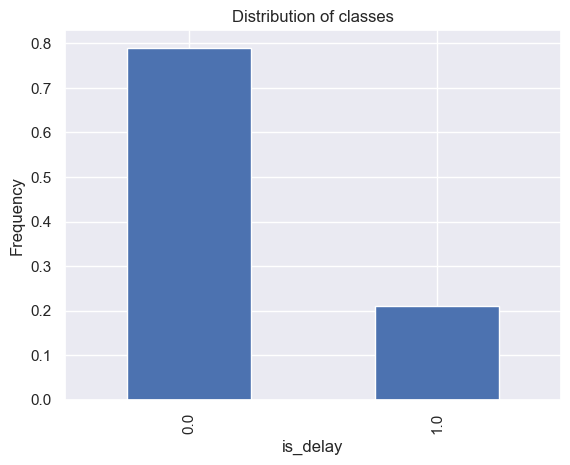

In [61]:
(data.groupby('is_delay').size()/len(data) ).plot(kind='bar')
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

- **Most flights (around 80%) are on time or experience a delay of less than 15 minutes (or no delay)** 
- **A smaller number of flights (around 20%) are delayed by more than 15 minutes** 
- This can mean that the dataset is imbalanced, with more flights being on-time than delayed. This imbalance may need to be addressed before building a machine learning model.

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

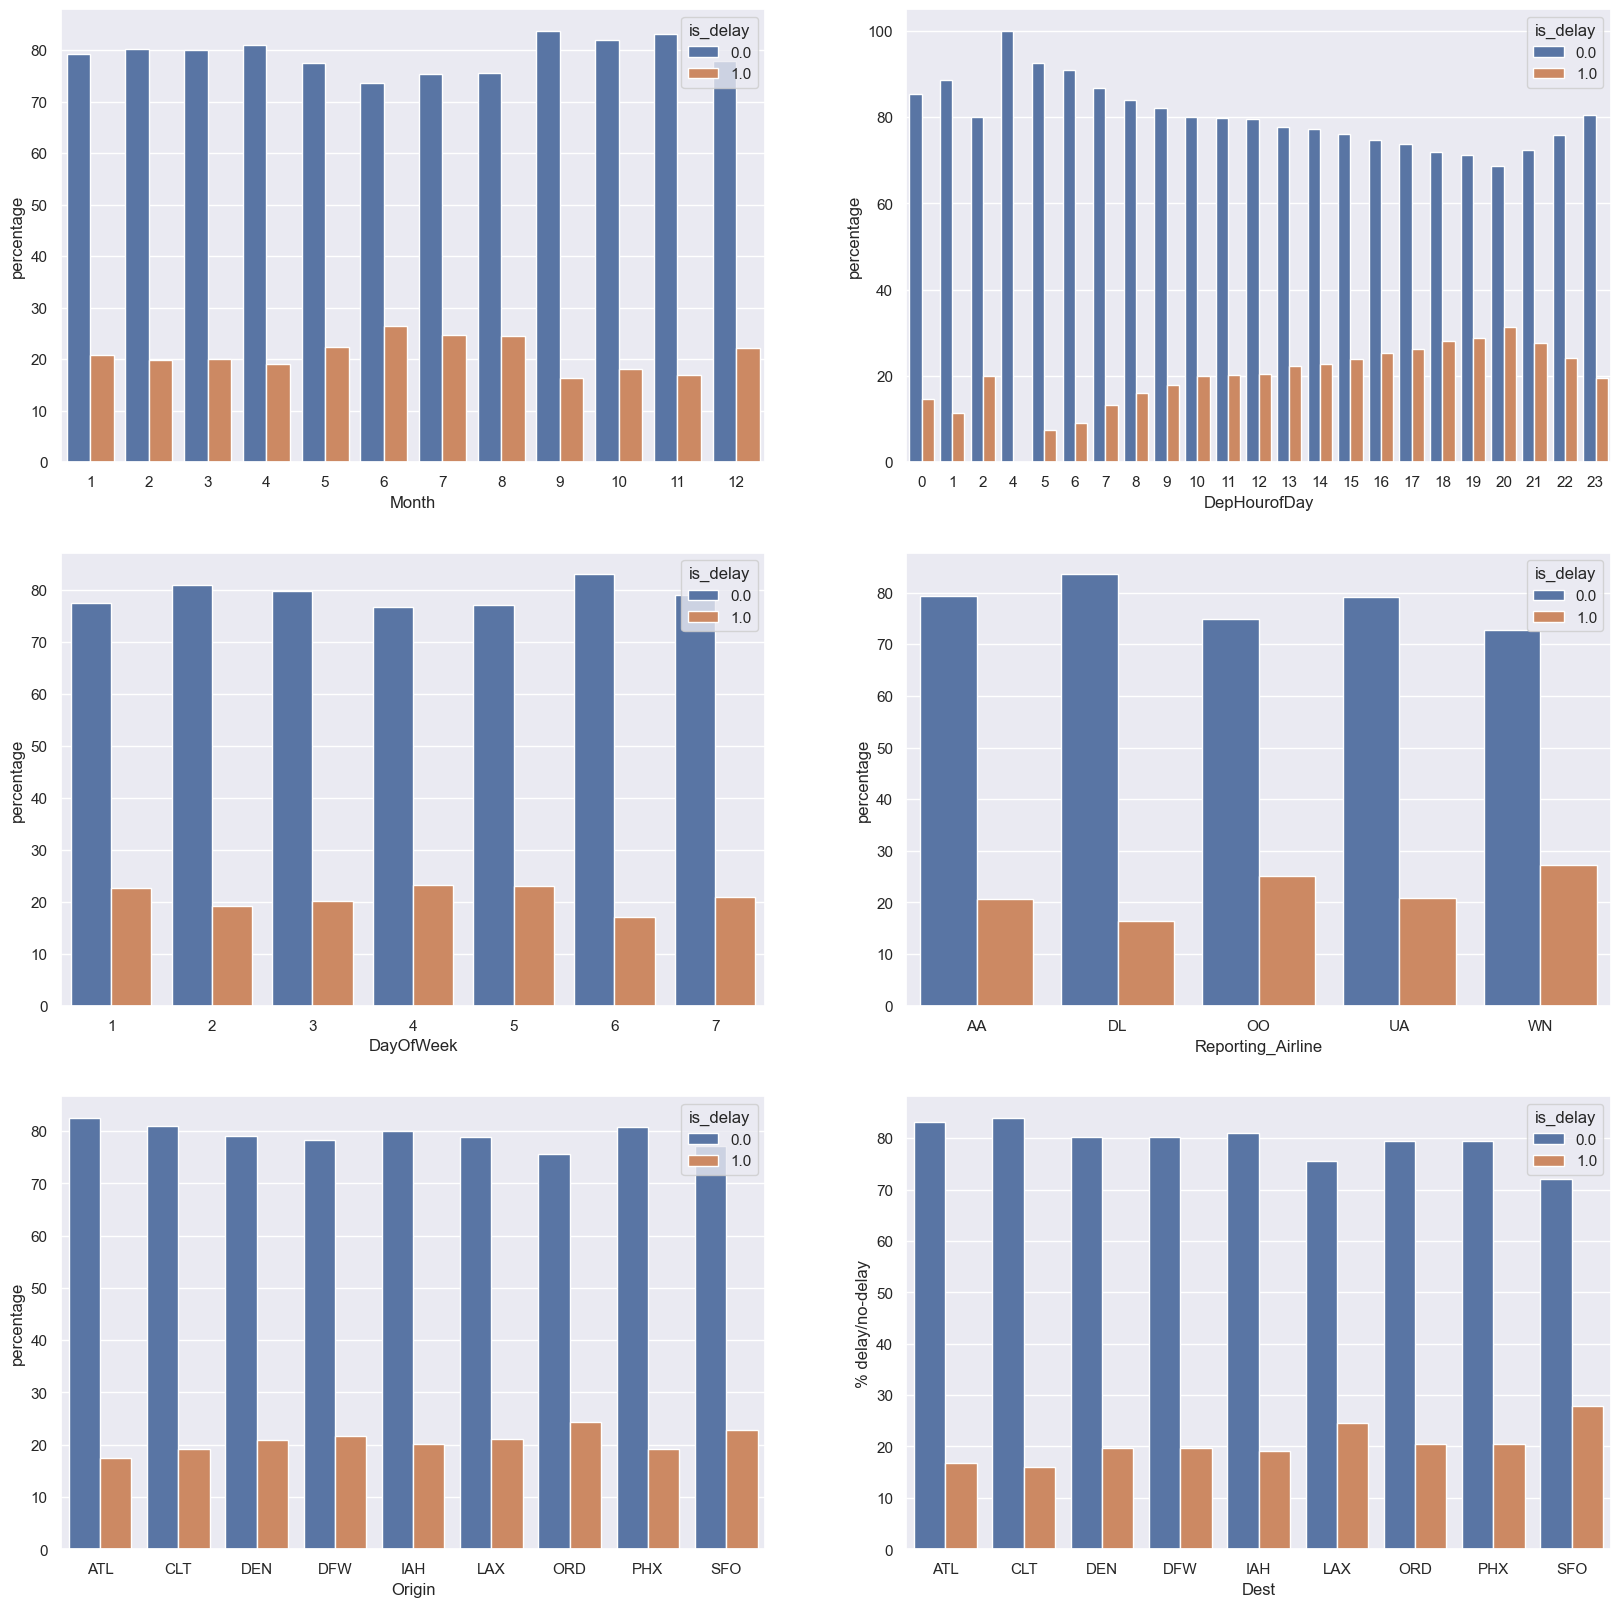

In [65]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

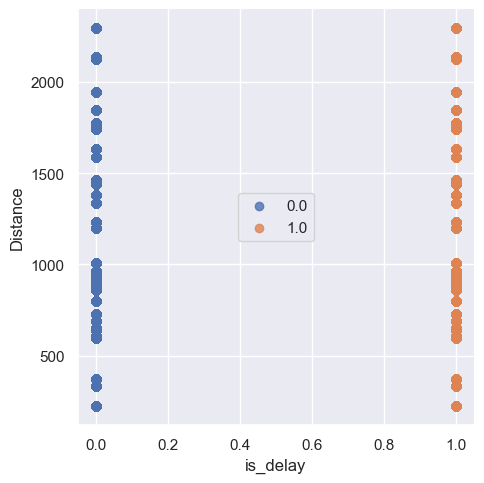

In [66]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

1. **Which months have the most delays?**

    -From the first bar plot, we can observe that the summer months, especially **June**, followed by **July** and **August**, experience the **highest number of delays**.

    -These months show a significantly higher number of delayed flights (represented by **1.0**) compared to the rest of the year while **September** has the **least delays**.
   

3. **What time of the day has the most delays?**

    -The second plot shows that the late afternoon to evening period, specifically between **15:00 (3 PM) and 20:00 (8 PM)**, sees the **highest smount of delays**, with **20:00 (8 PM)** having the **maximum delays**. 

    -On the other hand, flights earlier in the day, especially around **4:00 AM**, have almost **no delays**.
   

5. **What day of the week has the most delays?**

    -From the third plot, we see that **Day 4 (Thursday)** experiences the **most delays** compared to other days. 

    -**Day 2 (Tuesday)** has the **least delays**.
   

7. **Which airline has the most delays?**

    -The fourth plot shows that **WN Airlines** has the **most delays**, followed by **OO Airlines**.

    -**DL Airlines** have the **least number of delays**.


9. **Which origin and destination airports have the most delays?**

    -**SFO** has the **highest delays in destination airports** and **ORD** has **highest delays in arrival airports**.

   
10. **Is flight distance a factor in the delays?**

    -From the scatter plot, there is **no clear relationship between distance and delays**.

    -Flights with both short and long distances experience delays, indicating that distance alone is not a major factor contributing to delays.

    -Other variables, such as time of day or airport congestion, might be more influential in causing delays.


### Features

Look at all the columns and what their specific types are.

In [69]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [70]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay           int64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [72]:
data_orig = data.copy()
data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')

print(data.dtypes)

is_delay              float64
Quarter              category
Month                category
DayofMonth           category
DayOfWeek            category
Reporting_Airline    category
Origin               category
Dest                 category
Distance              float64
DepHourofDay         category
dtype: object


To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [74]:
data_dummies = pd.get_dummies(data[categorical_columns], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

Check the length of the dataset and the new columnms.

In [76]:
rows, columns = data.shape  
print(f"The dataset has {rows} rows and {columns} columns.")
print("Columns after one-hot encoding-")
print(data.columns)

The dataset has 1635590 rows and 94 columns.
Columns after one-hot encoding-
Index(['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Repo

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [79]:
data.rename(columns = {'is_delay': 'target'}, inplace=True )

In [80]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
combined_csv_filename_v1 = 'combined_csv_v1.csv'
data.to_csv(combined_csv_filename_v1, index=False)
print(f"Combined CSV file saved as {combined_csv_filename_v1}")
# note this combined file will be used in part B

Combined CSV file saved as combined_csv_v1.csv


# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [83]:
from sklearn.model_selection import train_test_split

# Features and target split
X = data.drop(columns=['target'])  # All columns except the target
y = data['target']  # Target variable

# Splitting the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the training and testing sets
print(f"Training features set shape- {X_train.shape}")
print(f"Testing features set shape- {X_test.shape}")
print(f"Training target set shape- {y_train.shape}")
print(f"Testing target set shape- {y_test.shape}")


Training features set shape- (1308472, 93)
Testing features set shape- (327118, 93)
Training target set shape- (1308472,)
Testing target set shape- (327118,)


### Baseline classification model

In [85]:
from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression(max_iter=1000)

# Training the baseline model on the training data
baseline_model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = baseline_model.predict(X_test)

## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [88]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(test_labels, target_predicted):
    """
    Plot the confusion matrix for a trained model.
    
    Parameters:
    test_labels (array): True labels of the dataset.
    target_predicted (array): Predicted labels from the model.
    """
    cm = confusion_matrix(test_labels, target_predicted)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

In [89]:
from sklearn.metrics import roc_curve, auc

def plot_roc(model, X_test, y_test):
    """
    Plot ROC curve for a trained model.
    
    Parameters:
    model : trained model name
    X_test (array): True labels of the dataset.
    y_test (array): Predicted labels from the model.
    
    Returns:
    float- Area Under the Curve (AUC) score
    """
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'(Model AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    
    return roc_auc

To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

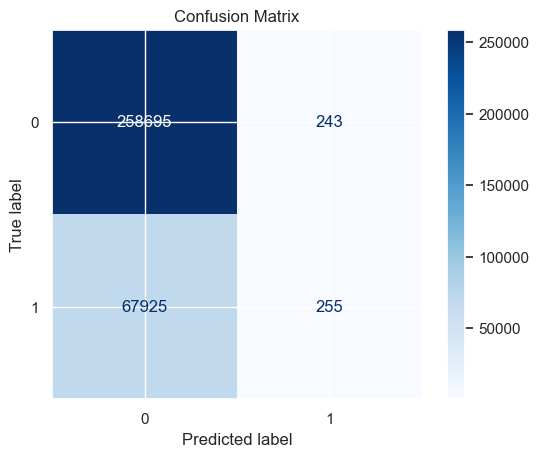

In [91]:
# Calling the function to plot the confusion matrix
plot_confusion_matrix(y_test, y_pred)

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

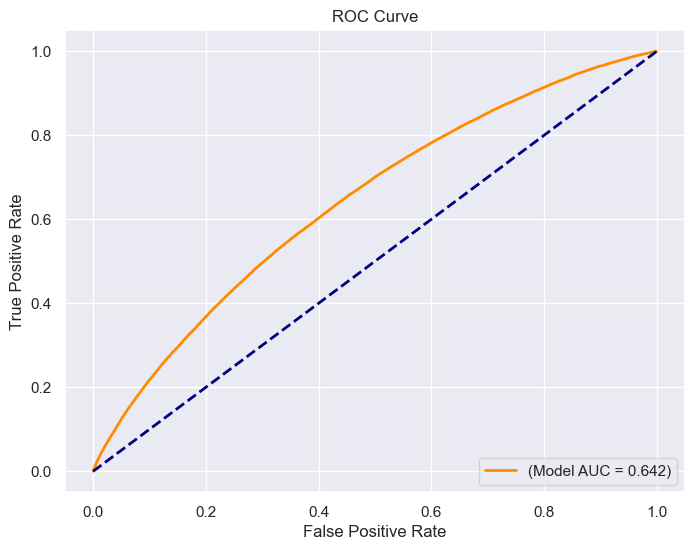

In [93]:
# Calling the function to plot the ROC curve
auc_score = plot_roc(baseline_model, X_test, y_test)
plt.show()

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Specificity calculation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall (Sensitivity): {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Specificity: {specificity:.2f}')


Accuracy: 0.79
Precision: 0.51
Recall (Sensitivity): 0.00
F1 Score: 0.01
Specificity: 1.00


### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


### Confusion Matrix Analysis

- **True Negatives (258,695)**: The model correctly identified a large number of **non-delayed flights**.
- **False Positives (243)**: Only a few **non-delayed flights** were wrongly predicted as delayed.
- **False Negatives (67,925)**: A significant number of **delayed flights** were misclassified as non-delayed.
- **True Positives (255)**: Very few **actual delays** were correctly predicted.

**The model heavily favors predicting non-delayed flights but struggles with correctly identifying delays, which is critical for this business case and may lead to inconvinience to customers.**


### ROC Curve Analysis

- The Area under the Curve is 0.64, this means that the model can differentiate between delayed and non-delayed flights, but not very well.


### Metric Summary

- **Accuracy (0.79)**: The accuracy is decent, but driven mainly by correct non-delay predictions.
- **Precision (0.51)**: Only **51% of predicted delays** were correct.
- **Recall (Sensitivity, 0.00)**: **Extremely poor** recall, the model misses nearly all true delays.
- **Specificity (1.00)**: The model is excellent at predicting non-delayed flights.

**The model's poor recall and high false negative rate make it unreliable for delay prediction, despite high accuracy for non-delayed flights.**


### How to improve model performance?
- **Balance the Dataset**: We need address class imbalance to improve recall.
- **Feature Engineering**: We can explore new features to capture more delay patterns.
- **Model Improvement**: We should implement more complex models like **Random Forest** or **XGBoost** for better performance.


# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


**GitLab Repository Link-**
https://gitlab.com/omishanagaraju/airplane-delays-prediction.gitlab

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [104]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html
# Converting FlightDate to datetime format
data_orig['FlightDate'] = pd.to_datetime(data_orig['FlightDate'])

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

# Converting holiday list to datetime for comparison
holidays = pd.to_datetime(holidays)

### Adding indicator variable for holidays
data_orig['is_holiday'] = data_orig['FlightDate'].isin(holidays)


Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [106]:
# download data from the link above and place it into the data folder
!curl -o ./weather_data.csv "https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1256k    0 1256k    0     0   261k      0 --:--:--  0:00:04 --:--:--  312k


Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [108]:
weather = pd.read_csv('weather_data.csv') 
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Mapping weather stations to airport code
station_map = dict(zip(station, airports))
weather['airport'] = weather['STATION'].map(station_map)

weather[['STATION', 'airport']].head()

,STATION,airport
0,USW00023174,LAX
1,USW00023174,LAX
2,USW00023174,LAX
3,USW00023174,LAX
4,USW00023174,LAX


Create another column called `MONTH` from the `DATE` column.

In [110]:
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1]) 
weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH
0,USW00023174,2014-01-01,16,0,NaN,NaN,131.0,178.0,78.0,LAX,01
1,USW00023174,2014-01-02,22,0,NaN,NaN,159.0,256.0,100.0,LAX,01
2,USW00023174,2014-01-03,17,0,NaN,NaN,140.0,178.0,83.0,LAX,01
3,USW00023174,2014-01-04,18,0,NaN,NaN,136.0,183.0,100.0,LAX,01
4,USW00023174,2014-01-05,18,0,NaN,NaN,151.0,244.0,83.0,LAX,01


### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [113]:
weather.SNOW.fillna(0, inplace=True)
weather.SNWD.fillna(0, inplace=True)
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [115]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = idx[weather['TAVG'].isna()]
TMAX_idx = idx[weather['TMAX'].isna()]
TMIN_idx = idx[weather['TMIN'].isna()]
TAVG_idx

array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [118]:
weather_impute = weather.groupby(['STATION','MONTH']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()
weather_impute.head(2)

,STATION,MONTH,TAVG,TMAX,TMIN
0,USW00003017,01,-2.741935,74.000000,-69.858065
1,USW00003017,02,11.219858,88.553191,-65.035461


Merge the mean data with the weather data.

In [120]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

weather.head()

,STATION,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,airport,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG
0,USW00023174,2014-01-01,16,0,0.0,0.0,131.0,178.0,78.0,LAX,01,148.619355,198.154839,103.477419
1,USW00023174,2014-01-02,22,0,0.0,0.0,159.0,256.0,100.0,LAX,01,148.619355,198.154839,103.477419
2,USW00023174,2014-01-03,17,0,0.0,0.0,140.0,178.0,83.0,LAX,01,148.619355,198.154839,103.477419
3,USW00023174,2014-01-04,18,0,0.0,0.0,136.0,183.0,100.0,LAX,01,148.619355,198.154839,103.477419
4,USW00023174,2014-01-05,18,0,0.0,0.0,151.0,244.0,83.0,LAX,01,148.619355,198.154839,103.477419


Check for missing values again.

In [122]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [124]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

In [125]:
# Converting FlightDate and DATE columns to datetime format
data_orig['FlightDate'] = pd.to_datetime(data_orig['FlightDate'])
weather['DATE'] = pd.to_datetime(weather['DATE'])

Add the origin and destination weather conditions to the dataset.

In [127]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [129]:
sum(data.isna().any())

0

In [130]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [132]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [133]:
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [136]:
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayO

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

In [138]:
data.shape

(1635590, 86)

Rename the `is_delay` column to `target` again. Use the same code as before.

In [140]:
data.rename(columns={'is_delay': 'target'}, inplace=True)

In [141]:
combined_csv_filename = 'combined_csv_v2.csv'
data.to_csv(combined_csv_filename, index=False)
print(f"The combined CSV file has been saved as {combined_csv_filename}")

The combined CSV file has been saved as combined_csv_v2.csv


Create the training and testing sets again.

In [143]:
X = data.drop(columns=['target']) 
y = data['target']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train2.shape} samples")
print(f"Testing set: {X_test2.shape} samples")

Training set: (1308472, 85) samples
Testing set: (327118, 85) samples


### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [145]:
classifier2 = LogisticRegression(max_iter=1000, random_state = 42)

# Training the model on the training set
classifier2.fit(X_train2, y_train2)

# Making predictions on the test set
y_pred2 = classifier2.predict(X_test2)

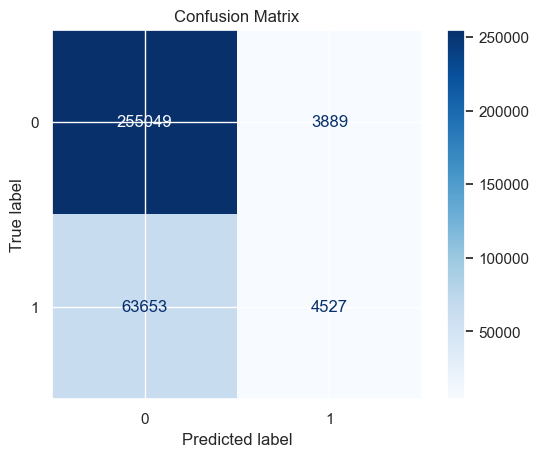

In [146]:
# Plotting confusion matrix for classifier2
plot_confusion_matrix(y_test2, y_pred2)

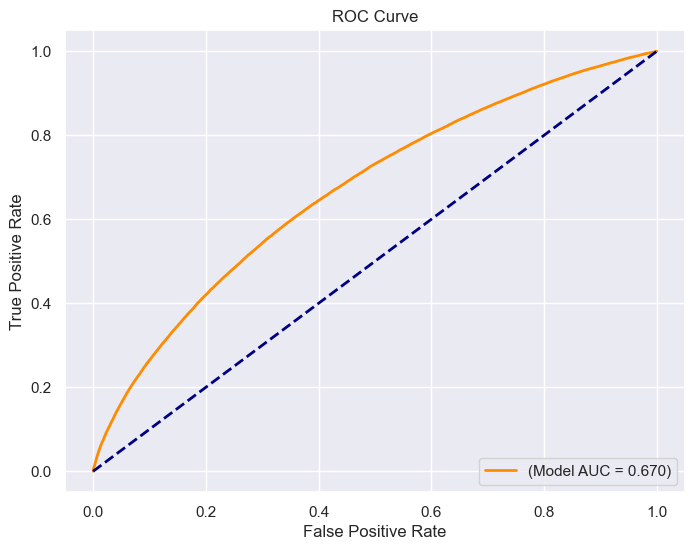

In [147]:
# Calling the function to plot the ROC curve
auc_score = plot_roc(classifier2, X_test2, y_test2)
plt.show()

In [148]:
# Accuracy metrics
accuracy = accuracy_score(y_test2, y_pred2)
precision = precision_score(y_test2, y_pred2)
recall = recall_score(y_test2, y_pred2)
f1 = f1_score(y_test2, y_pred2)

# Specificity calculation
tn, fp, fn, tp = confusion_matrix(y_test2, y_pred2).ravel()
specificity = tn / (tn + fp)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall (Sensitivity): {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Specificity: {specificity:.2f}')

Accuracy: 0.79
Precision: 0.54
Recall (Sensitivity): 0.07
F1 Score: 0.12
Specificity: 0.98


Perform the evaluaion as you have done with the previous model and plot/show the same metrics

## Confusion Matrix
- **True Negatives (255,949)**: The model correctly identified a significant number of non-delayed flights, similar to Model-1.
- **False Positives (3,889)**: A moderate number of non-delayed flights were wrongly classified as delayed, which is higher than in Model-1.
- **False Negatives (63,653)**: A large number of delayed flights were misclassified as non-delayed, this is lesser than in Model-1.
- **True Positives (4,527)**: More delayed flights were correctly identified compared to Model-1, indicating better performance in predicting delays.

## ROC Curve
- The Area Under the Curve (AUC) is **0.67**, which is slightly better than the AUC of Model-1 (0.64). This means that Model-2 is slightly better at distinguishing between delayed and non-delayed flights.

## Accuracy Metrics
- **Accuracy (0.79)**: The accuracy is the same as Model-1, meaning that the model still predicts non-delayed flights well but not very accurate with delays.
- **Precision (0.54)**: This is better than Model-1, with more predicted delays being correct. This means that when the model predicts a delay, it’s more likely to be right.
- **Recall (Sensitivity, 0.07)**: The recall has improved compared to Model-1, but it's still low, indicating that the model misses many actual delays.
- **F1 Score (0.12)**: This low F1 score indicates that the balance between precision and recall is still poor, as recall is too low.
- **Specificity (0.98)**: The model performs very well in predicting non-delayed flights, but this is at the cost of false negatives.

Question: did you notice a difference by adding the extra data on the results?

## Models Comparison
- **Comparison to Model-1**: Model-2 shows an improvement in identifying delayed flights, shown by the higher true positives (4,527 v/s. 255 in Model-1) and improved recall (0.07 v/s. 0.00 in Model-1). This suggests that the additional data or modifications in the model helped increase the model’s ability to detect delays.
- **Challenges**: Despite these improvements, the model still struggles with a low recall and a high false negative rate, meaning it continues to miss a significant portion of true delays which can be problematic for real-world application where predicting delays is critical.

# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

**Tableau Dashboard Link-**
https://public.tableau.com/app/profile/omisha.nagaraju/viz/FlightDelayDataDashboard/FlightDelayDashboard#1

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

### Conclusion

#### 1. **Does your model performance meet your business goal?**
The current model doesn't fully meet the goal. While accuracy and specificity are good, recall is poor, meaning many delays are missed. To improve the mode, few changes have to be made-
- Dataset should be balanced between classes to improve recall.
- Models like XGBoost can be used.
- Hyperparamenter tuning can optimize model performance.

#### 2. **How did your model improve with changes to the dataset?**
The model’s performance improved marginally after dataset adjustments, reflected in better precision and a slight increase in recall. However, recall remained low, as seen in the confusion matrix, where true positives (correctly predicted delays) increased still low. 
- **Feature Engineering** was most impactful in capturing hidden patterns in data.
- **Data balancing** slightly improved recall but needs further refinement.

#### 3. **Biggest Challenges**
One of the biggest challenges faced during this project was the class imbalance between delayed and non-delayed flights. The majority of the data consisted of non-delayed flights, which led the model to mainly predict the majority class (non-delays), while missing a significant portion of the minority class (delays). This skewed the predictions.
- **Bias Towards Majority Class**: Since non-delayed flights made up most of the dataset, the model learned patterns that heavily favored predicting non-delays. The model struggled to identify delays, leading to a high number of false negatives.  
- **Impact on Metrics**: While the model had a high accuracy (around 79%), this was largely because the model correctly predicted the majority of non-delayed flights. However, recall, which measures the ability to identify true delays, was extremely low, meaning the model wasn't useful for predicting delays—critical for the business goal.
Without addressing class imbalance, the model's performance on the minority class (delays) remains poor, which directly impacts its usefulness in real-world scenarios where predicting delays is crucial for customer satisfaction.

#### 4. **Key Learnings about Machine Learning**
- **Data imbalance affects performance**: Metrics like accuracy are misleading on imbalanced data—focus on precision and recall.
- **Feature Engineering**: Significantly improves model performance.
- **Model selection**: Different models handle data complexity differently, advanced models can offer better performance.
FURTHER STEPS TO TAKE BASED ON LEARNINGS-
- **Improve recall** by balancing the dataset and tuning models.
- **Use advanced models** like Gradient Boosting and XGBoost.
